In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [67]:
df=pd.read_csv('nafld1.csv')
df

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1
...,...,...,...,...,...,...,...,...,...,...
17544,11130,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,1099,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,1522,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,5764,17565,61,0,NaN,NaN,NaN,17276.0,3627,1


In [68]:
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [69]:
df.tail()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
17544,11130,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,1099,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,1522,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,5764,17565,61,0,NaN,NaN,NaN,17276.0,3627,1
17548,6658,17566,69,1,94.1,180.0,29.204650,2017.0,2744,0


In [70]:
df.shape

(17549, 10)

In [71]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [72]:
df.dtypes

Unnamed: 0      int64
id              int64
age             int64
male            int64
weight        float64
height        float64
bmi           float64
case.id       float64
futime          int64
status          int64
dtype: object

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [74]:
df.describe()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,17549.000000,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17518.000000,17549.000000,17549.000000
mean,8780.106046,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.539328,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,5051.334075,1573.017638,0.267746
min,1.000000,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4389.000000,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,4598.000000,1132.000000,0.000000
50%,8778.000000,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,8781.000000,2148.000000,0.000000
75%,13171.000000,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,13249.000000,3353.000000,0.000000
max,17566.000000,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


In [75]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)
df.drop(['case.id'],axis=1,inplace=True)
df

,age,male,weight,height,bmi,futime,status
0,57,0,60.0,163.0,22.690939,6261,0
1,67,0,70.4,168.0,24.884028,624,0
2,53,1,105.8,186.0,30.453537,1783,0
3,56,1,109.3,170.0,37.830100,3143,0
4,68,1,NaN,NaN,NaN,1836,1
...,...,...,...,...,...,...,...
17544,46,0,53.0,161.0,20.501023,1894,0
17545,52,1,111.8,154.0,47.335905,3841,0
17546,59,0,57.3,NaN,NaN,5081,0
17547,61,0,NaN,NaN,NaN,3627,1


In [76]:
df.isna().sum()

age          0
male         0
weight    4786
height    3168
bmi       4961
futime       0
status       0
dtype: int64

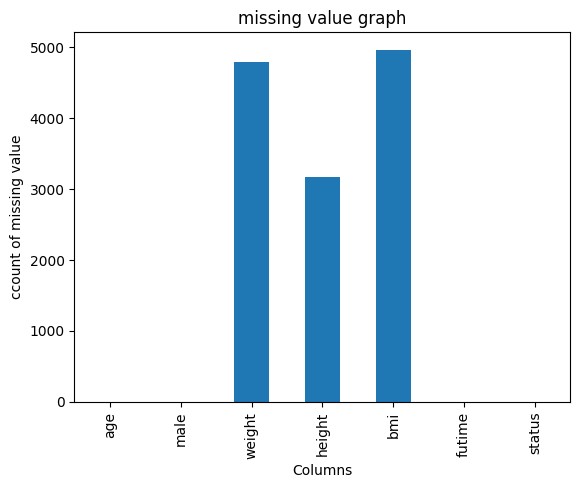

In [77]:
# type: ignore
df.isna().sum().plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('ccount of missing value')
plt.title('missing value graph')
plt.show()

In [78]:
df['weight']=df['weight'].fillna(df['weight'].mean())
df['height']=df['height'].fillna(df['height'].mean())
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
df

,age,male,weight,height,bmi,futime,status
0,57,0,60.00000,163.000000,22.690939,6261,0
1,67,0,70.40000,168.000000,24.884028,624,0
2,53,1,105.80000,186.000000,30.453537,1783,0
3,56,1,109.30000,170.000000,37.830100,3143,0
4,68,1,86.35335,169.434949,30.073865,1836,1
...,...,...,...,...,...,...,...
17544,46,0,53.00000,161.000000,20.501023,1894,0
17545,52,1,111.80000,154.000000,47.335905,3841,0
17546,59,0,57.30000,169.434949,30.073865,5081,0
17547,61,0,86.35335,169.434949,30.073865,3627,1


In [79]:
correlation=df.corr(numeric_only=True)
correlation

,age,male,weight,height,bmi,futime,status
age,1.000000,-0.051238,-0.081277,-0.161906,-0.014106,-0.087784,0.325870
male,-0.051238,1.000000,0.292059,0.624720,0.020136,-0.020314,0.022427
weight,-0.081277,0.292059,1.000000,0.416755,0.868995,-0.005742,-0.031207
height,-0.161906,0.624720,0.416755,1.000000,-0.023115,0.008321,-0.059190
bmi,-0.014106,0.020136,0.868995,-0.023115,1.000000,-0.004314,-0.000422
futime,-0.087784,-0.020314,-0.005742,0.008321,-0.004314,1.000000,-0.069584
status,0.325870,0.022427,-0.031207,-0.059190,-0.000422,-0.069584,1.000000


<Axes: >

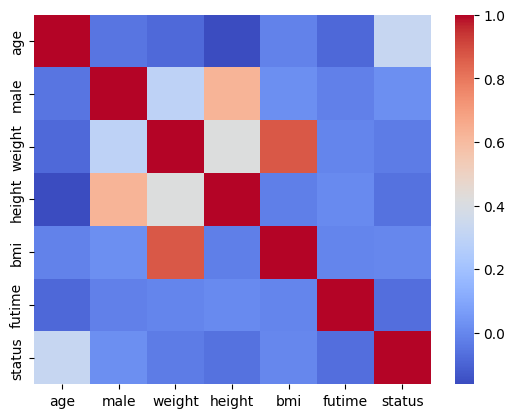

In [ ]:
sns.heatmap(correlation,cmap='coolwarm') 

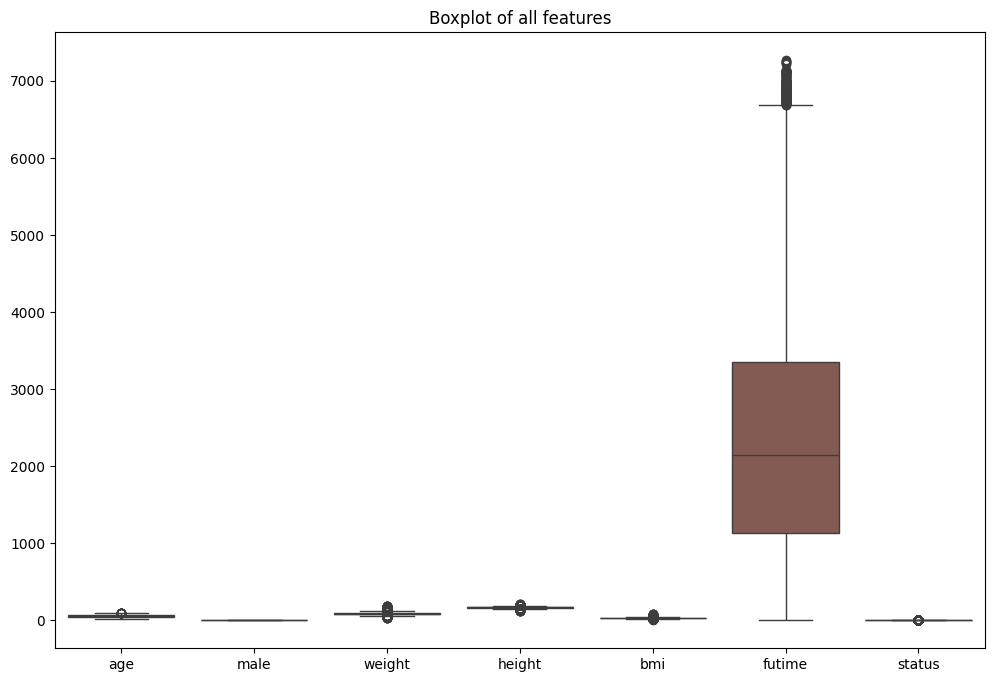

In [81]:
numeric_cols=df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of all features')
plt.show()

In [82]:
def remove_outliers(df,columns):
        Q1=df[columns].quantile(0.25)
        Q3=df[columns].quantile(0.75)
        IQR=Q3-Q1

        lower_bound=Q1 - 1.5 * IQR
        upper_bound=Q3 + 1.5 * IQR

        df=df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]
        return df

df_cleaned=remove_outliers(df,'weight',)

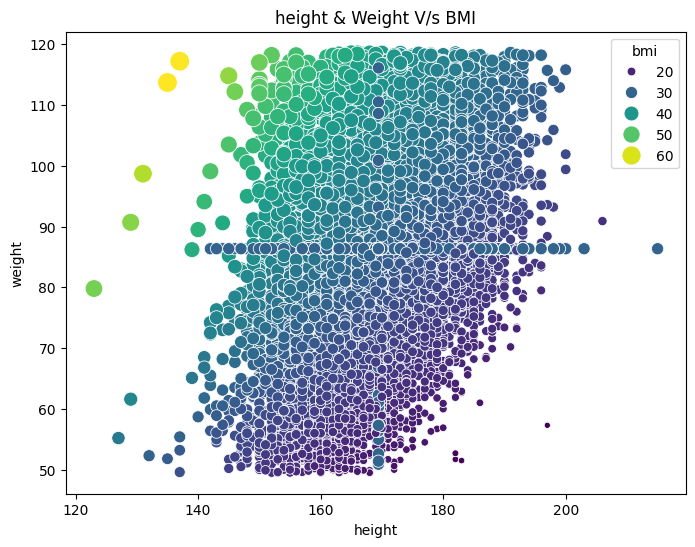

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height',y='weight',hue='bmi',size='bmi',data=df_cleaned,palette='viridis',sizes=(20,200))
plt.title('height & Weight V/s BMI')
plt.show()

In [84]:
x=df_cleaned.iloc[:,:-1].values
y=df_cleaned.iloc[:,-1].values

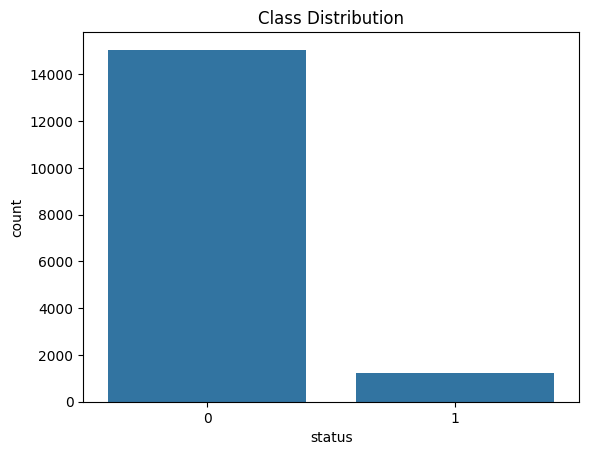

In [85]:
sns.countplot(x='status', data=df_cleaned)
plt.title('Class Distribution')
plt.show()

In [86]:
smt=SMOTE(random_state=42)
x,y=smt.fit_resample(x,y)

In [87]:
x.shape

(30118, 6)

In [88]:
y.shape

(30118,)

In [89]:
from sklearn.model_selection import train_test_split # type: ignore
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[6.60000000e+01, 0.00000000e+00, 6.17000000e+01, 1.55000000e+02,
        2.56978760e+01, 8.28000000e+02],
       [6.02130686e+01, 0.00000000e+00, 8.94513423e+01, 1.59019370e+02,
        3.53709089e+01, 1.23200000e+03],
       [5.48010205e+01, 3.80102048e-01, 8.63533495e+01, 1.76871665e+02,
        3.00738649e+01, 2.17142092e+03],
       ...,
       [6.70000000e+01, 0.00000000e+00, 7.07000000e+01, 1.70000000e+02,
        2.44636678e+01, 2.34500000e+03],
       [5.70000000e+01, 1.00000000e+00, 1.01200000e+02, 1.79000000e+02,
        3.15909766e+01, 3.14300000e+03],
       [6.21309369e+01, 8.74762524e-01, 9.96650885e+01, 1.79551622e+02,
        3.00455953e+01, 6.56248575e+02]], shape=(21082, 6))

In [90]:
from sklearn.preprocessing import StandardScaler # type: ignore
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [91]:
print(x_train.shape) 
print(y_train.shape) 

(21082, 6)
(21082,)


In [92]:
 # type: ignore
gnb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=7)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
rf = RandomForestClassifier(n_estimators=100,random_state=42)
lst=[gnb,knn,sv,dt,rf]

In [95]:
for i in lst:
    print("model name is",i,)
    print('************************')
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print("confusion metrics")
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('************************')
    print("classification report")
    cr=classification_report(y_test,y_pred)
    print(cr)
    print('*************************************************************************')

model name is GaussianNB()
************************
confusion metrics
[[3281 1268]
 [ 920 3567]]
************************
classification report
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4549
           1       0.74      0.79      0.77      4487

    accuracy                           0.76      9036
   macro avg       0.76      0.76      0.76      9036
weighted avg       0.76      0.76      0.76      9036

*************************************************************************
model name is KNeighborsClassifier(n_neighbors=7)
************************
confusion metrics
[[3734  815]
 [ 597 3890]]
************************
classification report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4549
           1       0.83      0.87      0.85      4487

    accuracy                           0.84      9036
   macro avg       0.84      0.84      0.84      9036
weighted avg    